# Práctico 1: Software para visualizar redes

# Introducción

La idea de este práctico es familiarizarse con diferentes formas de visualizar grafos. 

La forma más rápida de hacer esto es usando las herramientas provistas por `IGraph`, pero no necesariamente la mejor.

Luego de explorar que podemos hacer usando `IGraph`, vamos a trabajar con un programa externo llamado [Gephi](https://gephi.org/).

Comenzamos por installar `IGraph`

In [1]:
!pip install cairocffi
!pip install python-igraph

In [2]:
import igraph as ig
import numpy as np
import random
import matplotlib.pyplot as plt

# 1) IGraph

Nos creamos un grafo sencillo y regular.

In [3]:
help(ig.Graph.Lattice)

In [4]:
g_l = ig.Graph.Lattice(dim=[5, 5, 5])

ig.summary(g_l)

Descargamos el grafo con AIDSBLOG. El mismo consiste en una red de citas entre blog relacionados a el VIH.

In [5]:
!wget "https://raw.githubusercontent.com/prbocca/na101_master/master/homework_01_visualization/aidsblog.edgelist" -O "aidsblog.edgelist"

In [6]:
g_aids = ig.load("aidsblog.edgelist")

ig.summary(g_aids)

## Layout Circular

Una de las formas más simples de dibujar un gráfo consiste en ubicar todos los nodos en un círculo.

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
title = ["Lattice", "AidsBlog"]
for i, graph in enumerate([g_l, g_aids]):

  layout = graph.layout_circle()
  visual_style = {}
  visual_style["layout"] = layout
  visual_style["bbox"] = (300, 300)
  visual_style["margin"] = 10
  ax_ = ax[i]
  ig.plot(graph, **visual_style, target=ax_)
  _ = ax_.axis("off")
  ax_.set_title(title[i])

## Layout basado en spring-embedder

Otra forma tradicional de ubicar los nodos en un gráfo consiste en asumir que cada arista se comporta como un resorte y usar las leyes de la física para simular el sistema y encontrar la posición estable de cada nodo (partícula).

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
title = ["Lattice", "AidsBlog"]
for i, graph in enumerate([g_l, g_aids]):

  layout = graph.layout_fruchterman_reingold()
  visual_style = {}
  visual_style["layout"] = layout
  visual_style["bbox"] = (300, 300)
  visual_style["margin"] = 10
  ax_ = ax[i]
  ig.plot(graph, **visual_style, target=ax_)
  _ = ax_.axis("off")
  ax_.set_title(title[i])

## Layout based on multidimensional scaling (MDS)

In [9]:
help(ig.Graph.layout_kamada_kawai)

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
title = ["Lattice", "AidsBlog"]
for i, graph in enumerate([g_l, g_aids]):

  layout = graph.layout_kamada_kawai()
  visual_style = {}
  visual_style["layout"] = layout
  visual_style["bbox"] = (300, 300)
  visual_style["margin"] = 10
  ax_ = ax[i]
  ig.plot(graph, **visual_style, target=ax_)
  _ = ax_.axis("off")
  ax_.set_title(title[i])

In [59]:
l = g_aids.  layout = graph.layout_kamada_kawai()
[v for v in l]

## Layout para árboles

In [11]:
g_tree = ig.Graph(directed=True)
g_tree.add_vertices(10)
g_tree.add_edges([(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1,6), (2, 7), (2, 8), (3, 9)])

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i, layout_ in enumerate([g_tree.layout_circle, g_tree.layout_reingold_tilford, g_tree.layout_reingold_tilford_circular]):

  layout = layout_()
  visual_style = {}
  visual_style["layout"] = layout
  visual_style["margin"] = 10
  visual_style["vertex_label"] = range(g_tree.vcount())
  visual_style["vertex_size"] = 10
  ax_ = ax[i]
  ig.plot(g_tree, **visual_style, target=ax_)
  _ = ax_.axis("off")

## Layout para grafos bipartitos

In [12]:
g_bip = ig.Graph([(0, 1), (1, 2), (2,3), (3, 4)])
g_bip.vs["type"] = [True, False, True, False, True]
g_bip.vs["label"] = ["Actor 1", "Movie 1", "Actor 2", "Movie 2", "Actor 3"]

visual_style = {}
visual_style["layout"] = g_bip.layout_bipartite()
visual_style["bbox"] = (250, 150)
#visual_style["vertex_label"] = range(g_bip.vcount())
visual_style["vertex_shape"] = ["rectangle" if type_ else "circle" for type_ in g_bip.vs["type"]]
visual_style["vertex_color"] = ["red" if type_ else "cyan" for type_ in g_bip.vs["type"]]
ig.plot(g_bip, **visual_style)

## Decorando grafos.

Una parte importante de la visualización de grafos es como representar toda la información necesaria (adicional) en una imagen. Para esto, sobre vértices y aristas, podemos usar colores, formas y tamaños y darles a cada uno un significado especial.

Veremos como hacer esto a continuación usnado `IGraph`.

In [13]:
!wget "https://raw.githubusercontent.com/prbocca/na101_master/master/homework_01_visualization/karate.graphml" -O "karate.GraphML"

g_karate = ig.Graph.Read_GraphML("karate.GraphML")
del g_karate.vs["color"]
g_karate.vs["Faction"] = list(map(int, g_karate.vs["Faction"]))

El grafo tiene varios atributos: `Author, Citation, name`

Los vértices tienen atributos: `Fraction, id, label, name`

Y las aristas tienen peso: `weight`

In [14]:
ig.summary(g_karate)

In [15]:
#ejemplo de atributos del vértice 0

g_karate.vs[0].attributes()

In [16]:
random.seed(1234)
ig.plot(g_karate)

Para decorar un grafo en `IGraph` vamos a utilizar un diccionario llamado `visual_style` (el nombre puede ser cualquiera) en el que vamos a definir las propiedades de interes.

A continuación mostramos con un ejemplo como cambiar muchas de ellas.

La lista completa se encuentra en la documentación de `python-igraph`. 

In [17]:
g_karate.vs["label"] = [s.replace("Actor ", "") for s in g_karate.vs["name"]]

visual_style = dict()
visual_style["layout"] = g_karate.layout()
visual_style["vertex_shape"] = ["rectangle" if name_ in ["Mr Hi", "John A"] else "circle" for name_ in g_karate.vs["name"]]
visual_style["vertex_color"] = ["red" if type_ == 1 else "blue" for type_ in g_karate.vs["Faction"]]
visual_style["vertex_size"] = g_karate.strength()
visual_style["edge_width"] = g_karate.es["weight"]

f1 = g_karate.vs.select(Faction=1)
f2 = g_karate.vs.select(Faction=2)
g_karate.es.select(_between=(f1, f1))["color"] = "pink"
g_karate.es.select(_between=(f2, f2))["color"] = "skyblue"
g_karate.es.select(_between=(f1, f2))["color"] = "yellow"

ig.plot(g_karate, **visual_style)

## Visualizando redes con muchos nodos

Visualizar correctamente redes muy grandes es un gran desafio (estético y computacional).

In [18]:
!wget "https://raw.githubusercontent.com/prbocca/na101_master/master/homework_01_visualization/fblog.graphml" -O "fblog.graphml"

Veamos un resumen del grafo y sus atributos.

In [19]:
g_fblog = ig.load("fblog.graphml")

ig.summary(g_fblog)

La variable `PolParty` representa los partidos políticos, y parece relevante para la visualización.

In [20]:
g_fblog.vs[0].attributes()

In [21]:
#cantidad de vértices en cada partido político

from collections import Counter
counter=Counter(g_fblog.vs["PolParty"])
counter

Primero vamos a graficar el grafo entero. Para esto vamos a tener que transformar el partido político en enteros, y asi poder luego transformarlo en un color. Para esto vamos a usar un `LabelEncoder` de la biblioteca `scikit-learn`.

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(g_fblog.vs["PolParty"])

In [23]:
colors = ig.ClusterColoringPalette(len(le.classes_))

In [24]:
random.seed(1234)
visual_style = dict()
visual_style["layout"] = g_fblog.layout_kamada_kawai()
visual_style["bbox"] = (400, 400)
visual_style["vertex_size"] = 7
visual_style["vertex_color"] = [colors[x] for x in le.transform(g_fblog.vs["PolParty"])]
visual_style["edge_width"] = 0.1
ig.plot(g_fblog, **visual_style)

In [25]:
random.seed(42)
visual_style["layout"] = g_fblog.layout_drl()
ig.plot(g_fblog, **visual_style)

In [26]:
classes = le.transform(g_fblog.vs["PolParty"])

Otra alternativa para visualizar el grafo es contraer todos los nodos del mismo partido político y representarlos como un mismo nodo.

Vemos a continuación como hacer esto con `IGraph`.

In [27]:
g_contracted = g_fblog.copy()

In [28]:
g_contracted.contract_vertices(classes)

In [29]:
g_contracted.simplify()

In [30]:
from collections import Counter
g_contracted.vs["size"] = [Counter(classes)[x] for x in range(len(classes))]
g_contracted.vs["label"] = le.classes_
ig.plot(g_contracted)

#2) Gephi Tutorial

Gephi es una excelente herramienta para visualizar grafos mientras se exploran sus propiedades.

Gephi es muy potente, pero requiere aprender a usarlo.

En esta sección pediremosw seguir el siguiente Tutorial: [gephi-tutorial-quick_start.pdf](https://github.com/prbocca/na101_master/raw/master/homework_01_visualization/gephi-tutorial-quick_start.pdf)

Será necesario descargar el grafo Les Miserables: [LesMiserables.gexf](https://raw.githubusercontent.com/prbocca/na101_master/master/homework_01_visualization/LesMiserables.gexf)

En el proceso del tutorial se irá mejorando la visualización, la siguiente figura resume el proceso:
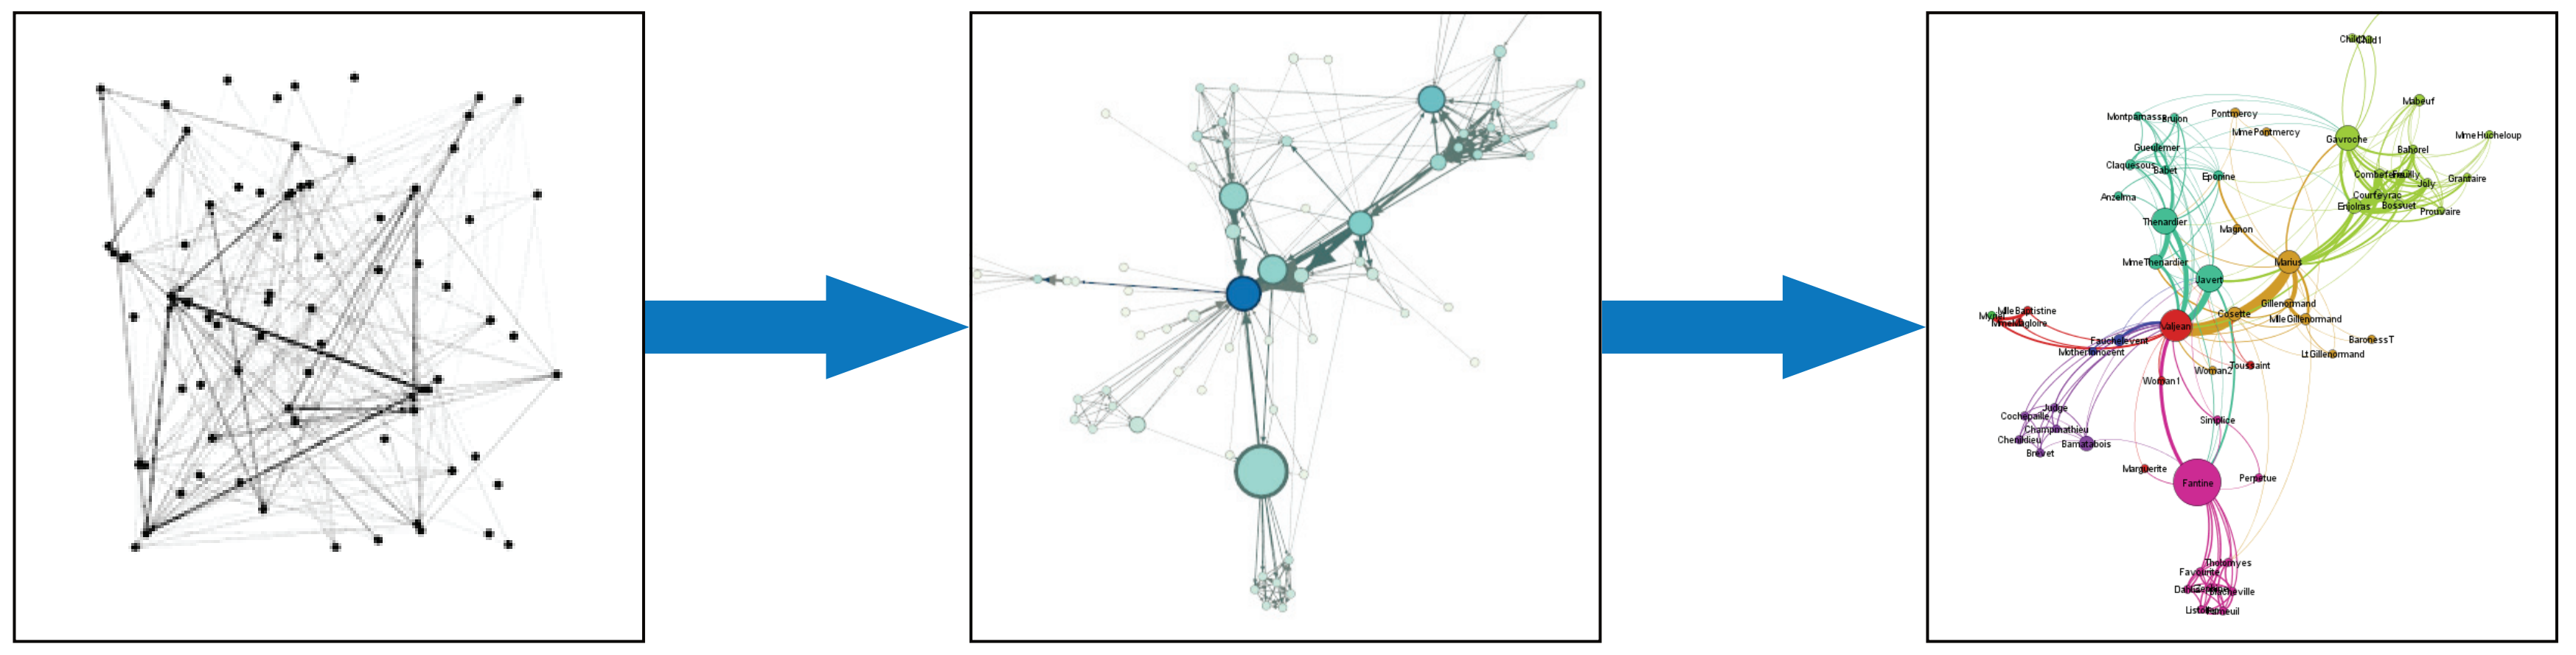


#3) Gephi

En esta sección vamos a volver a trabajar con la red de emails de Enron. 

Recordamos que generamos un archivo con la red. 
En este caso vamos a descargar uno de esos archivos y exportarlo en un formato que pueda ser leido por `Gephi`. 

Luego, vamos a utilizar `Gephi` para logar cierta visualización y re-importarla en el notebook.

Este es un procedimiento común, que se aplica a muchas investigaciones en redes: 

* a) Trabajamos los datos desde `Python+IGraph`, y generamos un archivo de grafo.
* b) visualizamos y exploramos el grafo desde `Gephi`. Concluimos que filtros y calculos convienen realizar sobre el grafo.
* c) realizamos esos calculos desde `Python+IGraph` y continamos el proyecto...

In [31]:
!wget "https://raw.githubusercontent.com/prbocca/na101_master/master/homework_01_visualization/enron.gplus.pjk" -O "enron.gplus.pjk"

In [32]:
g_enron = ig.load(filename="enron.gplus.pjk", format = "pajek") #este es el que se usará en el práctico 3
ig.summary(g_enron)

random.seed(1234)
ig.plot(g_enron)

## Exportando el grafo a Gephi

Primero, exportemos el grafo a formato `GraphML`.

In [33]:
ig.write(g_enron, "enron.graphml", "graphml")

## Descargar el grafo para usar en Gephi

Podemos descargar el archivo generado `enron.graphml` desde Google Colab navegando hacia la carpeta que se encuentra a la izquierda, ubicando el archivo deseado y descargandolo.

**Para usar `Gephi` en Mac hay que cambiar la apariencia a otra cosa que el por defecto, sino se tranca (Gephi -> Preferences -> Look and Feel -> Metal).**

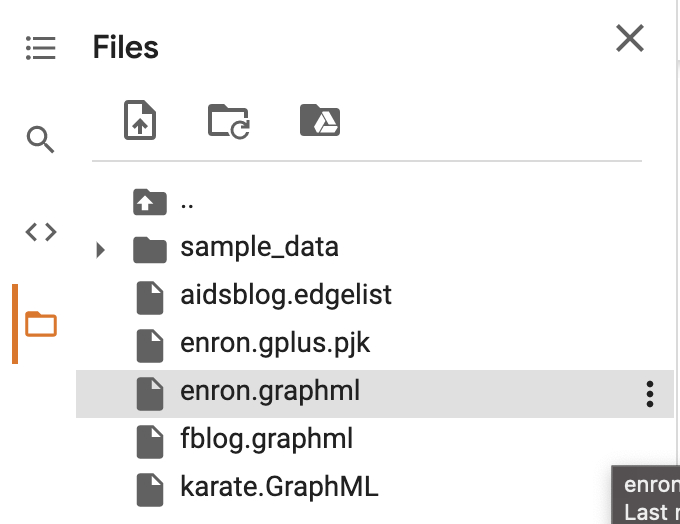




## Cargar el grafo en Gephi y mejorar su visualización

En Gephi, visualizar el grafo.


**Instrucciones**
* Usar de Layout: Force Atlas, con Repulsion strength=10000
* Usar como tamaño de nodo la centralidad de intermediación (calcularla antes en estadísticas)
      Node size - Betweenness Centrality - Min size 10 / Max size 50
* Usar como color de nodo la partición en comunidades que surge de la modularidad    
      Node color - partiton Modularity class
* Usar como etiqueta de nodos al atributo "name"
      Node label - name 
* Usar como tamaño de etiqueta de nodo la centralidad de intermediación
      Node label size - betweeenness centralitiy 
* Filtar (remover) los vértices con grado menor a 30.

* En el preview:
    *  Visualizar etiquetas de nodos, y definir Max Characters=20 para ellas (si en lugar de los nombres se muestran los ids, entonces copiar la columna "name" en "label")
    *  Rescalar los pesos entre 0.1 y 100




El resultado debe ser similar a la siguiente figura.

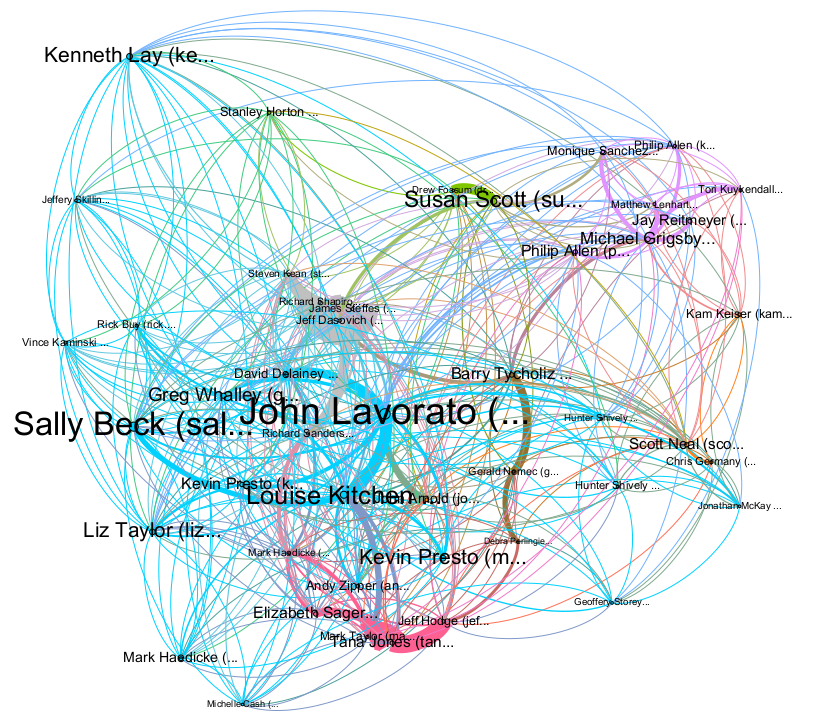

## Exportar el grafo obtenido en Gephi y visualizarlo desde IGraph

Podemos guardar el grafo generado en Gephi.
Supongamos que esto se hace con el nombre `enron_gephi.graphml`.

Podemos subirlo a Google Colab (similar a como lo descargamos), y luego cargarlo con el siguiente código.

Verán como se han agregado atributos de visualización al grafo.

In [34]:
g_enron_gephi = ig.load("enron_gephi.graphml")

ig.summary(g_enron_gephi)

El nuevo grafo tiene cargados muchos atributos, incluyendo la posicion (x,y) para visualizar cada vértice

```
IGRAPH DNW- 184 3007 -- 
+ attr: Betweenness Centrality (v), Closeness Centrality (v), Eccentricity (v), Harmonic Closeness Centrality (v), Modularity Class (v), b (v), g (v), id (v), label (v), name (v), r (v), size (v), x (v), y (v), Edge Label (e), id (e), weight (e)
```



In [36]:
g_enron_gephi.vs[0].attributes()

In [37]:
g_enron_gephi.es[0].attributes()

In [41]:
g_enron_gephi.vs["label"] = [s[:20] for s in g_enron_gephi.vs["label"]] #recortar los labels a 20 caracteres

Lamentable la visualización por defecto sigue siendo bastante peor que la de Gephi. A pesar de usar los atributos de coordenadas para la posición de los vértices.

In [75]:
ig.plot(g_enron_gephi)

Ajustando un poco las escalas logramos mejor presentación.

In [81]:
g_enron_gephi.vs["label"] = [s[:20] for s in g_enron_gephi.vs["label"]] #recortar los labels a 20 caracteres

visual_style = dict()
visual_style["bbox"] = (1200, 1200)
visual_style["vertex_size"] = g_enron_gephi.vs["size"]

#reescalo las posiciones
rescale = 600 / max(g_enron_gephi.vs["x"])
g_enron_gephi.vs["x"] = np.array(g_enron_gephi.vs["x"])*rescale
g_enron_gephi.vs["y"] = np.array(g_enron_gephi.vs["y"])*rescale

#rescalo los pesos
edge_width = np.array(g_enron_gephi.es["weight"])
edge_width = np.interp(edge_width, (edge_width.min(), edge_width.max()), (0.1, 30))
visual_style["edge_width"] = edge_width
visual_style["edge_arrow_size"] = edge_width/10

ig.plot(g_enron_gephi, **visual_style)